# ETL: Analisis Pola Hubungan Antara Tingkat Pendidikan dan Pengangguran terhadap Kemiskinan di Berbagai Negara

In [33]:
#@title 📌 Judul dan Deskripsi Proyek

# Judul dan Deskripsi Proyek
judul_proyek = "ETL: Analisis Pola Hubungan Antara Tingkat Pendidikan dan Pengangguran terhadap Kemiskinan di Berbagai Negara"
deskripsi = """
Proyek ini bertujuan untuk mengekstrak data dari beberapa sumber:
Menganalisis hubungan antara tingkat pendidikan, pengangguran, dan pendapatan per kapita di berbagai negara untuk mengidentifikasi pola dan rekomendasi kebijakan.

Data akan dibersihkan, ditransformasi, lalu digabungkan untuk Analisis Pola Hubungannya.
"""

print(judul_proyek)
print(deskripsi)

ETL: Analisis Pola Hubungan Antara Tingkat Pendidikan dan Pengangguran terhadap Kemiskinan di Berbagai Negara

Proyek ini bertujuan untuk mengekstrak data dari beberapa sumber:
Menganalisis hubungan antara tingkat pendidikan, pengangguran, dan pendapatan per kapita di berbagai negara untuk mengidentifikasi pola dan rekomendasi kebijakan.

Data akan dibersihkan, ditransformasi, lalu digabungkan untuk Analisis Pola Hubungannya.



# Extract data pendidikan dari worldbank

In [10]:
import requests
import zipfile
import io
import pandas as pd

# URL file ZIP dari World Bank
url = "https://api.worldbank.org/v2/en/topic/4?downloadformat=csv"

# Download file ZIP
response = requests.get(url)
if response.status_code == 200:
    print("Download berhasil.")

    # Buka file ZIP dari memori
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Tampilkan daftar file dalam ZIP
        print("Daftar file dalam ZIP:")
        z.printdir()

        # Cari file CSV yang kita butuhkan
        target_filename = "API_4_DS2_en_csv_v2_2754.csv"
        if target_filename in z.namelist():
            # Ekstrak dan baca file CSV
            with z.open(target_filename) as csv_file:
                df = pd.read_csv(csv_file, skiprows=4)  # Skip 4 baris awal metadata
                print("Data berhasil dibaca.")
        else:
            print(f"File {target_filename} tidak ditemukan dalam ZIP.")
else:
    print("Gagal mengunduh file.")

# Kalau kamu ingin menyimpan data ke file lokal
df.to_csv("pendidikan.csv", index=False)

Download berhasil.
Daftar file dalam ZIP:
File Name                                             Modified             Size
Metadata_Indicator_API_4_DS2_en_csv_v2_2754.csv 2025-06-05 10:40:48        70651
API_4_DS2_en_csv_v2_2754.csv                   2025-06-05 10:40:50     22071220
Metadata_Country_API_4_DS2_en_csv_v2_2754.csv  2025-06-05 10:40:50        59105
Data berhasil dibaca.


# Extract data kemiskinan

In [11]:
import requests
import zipfile
import io
import pandas as pd

# URL file ZIP dari World Bank untuk indikator kemiskinan
url = "https://api.worldbank.org/v2/en/indicator/SI.POV.DDAY?downloadformat=csv"

# Download file ZIP
response = requests.get(url)
if response.status_code == 200:
    print("Download berhasil.")

    # Buka file ZIP dari memori
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Tampilkan daftar file dalam ZIP
        print("Daftar file dalam ZIP:")
        z.printdir()

        # Cari file CSV yang kita butuhkan
        target_filename = "API_SI.POV.DDAY_DS2_en_csv_v2_4962.csv"
        if target_filename in z.namelist():
            # Ekstrak dan baca file CSV
            with z.open(target_filename) as csv_file:
                df_poverty = pd.read_csv(csv_file, skiprows=4)  # Skip 4 baris metadata
                print("Data kemiskinan berhasil dibaca.")
        else:
            print(f"File {target_filename} tidak ditemukan dalam ZIP.")
else:
    print("Gagal mengunduh file.")

# Kalau kamu ingin menyimpan data ke file lokal
df_poverty.to_csv("kemiskinan.csv", index=False)


Download berhasil.
Daftar file dalam ZIP:
File Name                                             Modified             Size
Metadata_Indicator_API_SI.POV.DDAY_DS2_en_csv_v2_4962.csv 2025-06-05 12:39:10          804
API_SI.POV.DDAY_DS2_en_csv_v2_4962.csv         2025-06-05 12:39:10        89767
Metadata_Country_API_SI.POV.DDAY_DS2_en_csv_v2_4962.csv 2025-06-05 12:39:10        59105
Data kemiskinan berhasil dibaca.


# Extract data pengangguran dari worldbank

In [12]:
import requests
import pandas as pd
import io

# URL dari ILO Data API
url = "https://rplumber.ilo.org/data/indicator/?id=SDG_0111_SEX_AGE_RT_A&timefrom=2014&timeto=2024&type=label&format=.csv"

# Lakukan request ke URL
response = requests.get(url)

if response.status_code == 200:
    print("Download berhasil.")

    # Baca isi CSV ke dalam DataFrame
    df_ilo = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
    print("Data berhasil dibaca.")
else:
    print(f"Gagal mengunduh data. Status code: {response.status_code}")

# Kalau kamu ingin menyimpan data ke file lokal
df_ilo.to_csv("pengangguran.csv", index=False)

Download berhasil.
Data berhasil dibaca.


# Merapikan pendidikan.csv

In [18]:
import pandas as pd

# Baca CSV tanpa skiprows
education_df = pd.read_csv("pendidikan.csv")

# Bersihkan nama kolom dari spasi
education_df.columns = education_df.columns.str.strip()

# Filter indikator pendidikan
edu_filtered = education_df[
    education_df["Indicator Name"] == "Government expenditure on education, total (% of GDP)"
]

# Ubah dari wide format ke long format
edu_long = edu_filtered.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Education Expenditure (% of GDP)"
)

# Pastikan kolom 'Year' adalah numerik (bukan "Unnamed" atau tahun kosong)
edu_long = edu_long[pd.to_numeric(edu_long["Year"], errors="coerce").notnull()]
edu_long["Year"] = edu_long["Year"].astype(int)

# Simpan file CSV rapi
edu_long.to_csv("clean_education_filtered.csv", index=False)

# Tampilkan hasil awal
edu_long.head()

# ka ingin menghapus kolom-kolom tak penting seperti "Unnamed: 69" sebelum .melt()
education_df = education_df.loc[:, ~education_df.columns.str.contains("^Unnamed")]

# Merapikan pengangguran.csv

In [20]:
# Baca file langsung (sudah bersih)
unemployment_df = pd.read_csv("pengangguran.csv")

# Ambil kolom penting dan ubah nama kolom
unemployment_clean = unemployment_df[[
    "ref_area.label", "time", "obs_value"
]].rename(columns={
    "ref_area.label": "Country Name",
    "time": "Year",
    "obs_value": "Working Poverty Rate"
})

# Simpan hasil
unemployment_clean.to_csv("clean_unemployment.csv", index=False)


# Merapikan kemiskinan.csv

In [23]:
import pandas as pd

# Baca file tanpa skiprows
poverty_df = pd.read_csv("kemiskinan.csv")

# Hapus kolom yang tidak berguna (biasanya 'Unnamed: 69')
poverty_df = poverty_df.loc[:, ~poverty_df.columns.str.contains("^Unnamed")]

# Ubah dari wide ke long format
poverty_long = poverty_df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Poverty Rate"
)

# Filter hanya baris dengan tahun numerik
poverty_long = poverty_long[pd.to_numeric(poverty_long["Year"], errors="coerce").notnull()]
poverty_long["Year"] = poverty_long["Year"].astype(int)

# Simpan hasilnya ke file CSV
poverty_long.to_csv("clean_poverty.csv", index=False)

# Merge 3 data csv

In [36]:
import pandas as pd

# 1. Load data bersih
education = pd.read_csv("clean_education_filtered.csv")
poverty = pd.read_csv("clean_poverty.csv")
unemployment = pd.read_csv("clean_unemployment.csv")

# 2. Gabungkan education dan poverty berdasarkan 'Country Name' dan 'Year'
merged = pd.merge(
    education[["Country Name", "Year", "Education Expenditure (% of GDP)"]],
    poverty[["Country Name", "Year", "Poverty Rate"]],
    on=["Country Name", "Year"],
    how="inner"
)

# 3. Gabungkan dengan unemployment data
merged = pd.merge(
    merged,
    unemployment[["Country Name", "Year", "Working Poverty Rate"]],
    on=["Country Name", "Year"],
    how="inner"
)

# 4. Hapus baris yang memiliki nilai kosong (NaN)
merged = merged.dropna()

# 5. Simpan data gabungan
merged.to_csv("final_education_poverty_analysis.csv", index=False)

# 6. Tampilkan contoh
print(merged.head())


   Country Name  Year  Education Expenditure (% of GDP)  Poverty Rate  \
9       Albania  2014                          3.216967           3.7   
10      Albania  2014                          3.216967           3.7   
11      Albania  2014                          3.216967           3.7   
12      Albania  2014                          3.216967           3.7   
13      Albania  2014                          3.216967           3.7   

    Working Poverty Rate  
9                  0.305  
10                 0.890  
11                 0.248  
12                 0.173  
13                 0.256  


# Menghubungkan Aiven

In [37]:
!pip install sqlalchemy psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.3 MB/s eta 0:00:00


In [38]:
from sqlalchemy import create_engine

# Ganti dengan kredensial koneksi dari Aiven PostgreSQL kamu
db_user = "avnadmin"
db_pass = "AVNS_CLqCMnaw7Q5P6thn3c_"
db_host = "pg-19030d2a-enjangmargha-87878.b.aivencloud.com"
db_port = "25774"  # default port dari Aiven PostgreSQL
db_name = "defaultdb"
ssl_mode = "require"  # Aiven biasanya butuh SSL

# Format connection URL
connection_url = f"postgresql+psycopg2://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}?sslmode={ssl_mode}"

# Buat engine SQLAlchemy
engine = create_engine(connection_url)

# Upload DataFrame ke PostgreSQL (buat tabel baru atau timpa jika ada)
merged.to_sql("education_poverty_analysis", engine, if_exists="replace", index=False)

print("✅ Data berhasil dikirim ke PostgreSQL Aiven.")

✅ Data berhasil dikirim ke PostgreSQL Aiven.


# Analisa Data

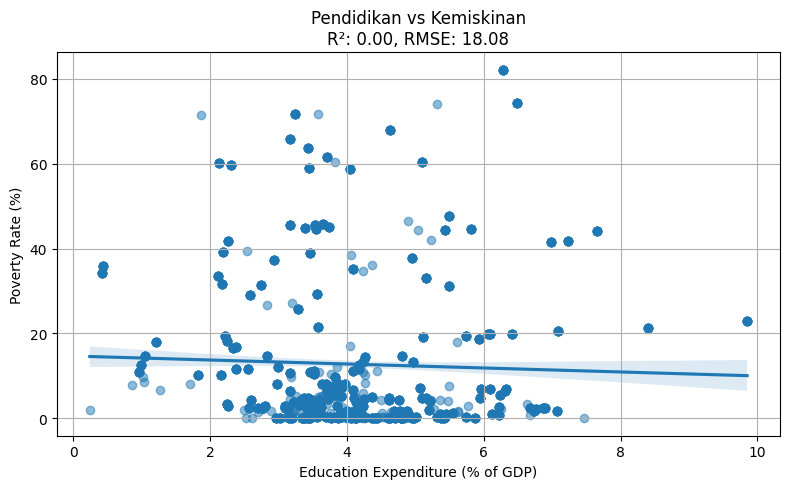

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fitur dan target
X = merged[["Education Expenditure (% of GDP)"]]
y_poverty = merged["Poverty Rate"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_poverty, test_size=0.2, random_state=42)

# Model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluasi model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Visualisasi hubungan linear
plt.figure(figsize=(8, 5))
sns.regplot(x="Education Expenditure (% of GDP)", y="Poverty Rate", data=merged, scatter_kws={'alpha':0.5})
plt.title(f"Pendidikan vs Kemiskinan\nR²: {r2:.2f}, RMSE: {rmse:.2f}")
plt.xlabel("Education Expenditure (% of GDP)")
plt.ylabel("Poverty Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
print("=== Koefisien Regresi Linear ===")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Koefisien: {model.coef_[0]:.2f}")

if model.coef_[0] < 0:
    print("→ Hubungan negatif: Semakin tinggi pengeluaran pendidikan, semakin rendah tingkat kemiskinan.")
else:
    print("→ Hubungan positif: Semakin tinggi pengeluaran pendidikan, semakin tinggi tingkat kemiskinan.")

=== Koefisien Regresi Linear ===
Intercept: 14.26
Koefisien: -0.34
→ Hubungan negatif: Semakin tinggi pengeluaran pendidikan, semakin rendah tingkat kemiskinan.


In [41]:
def prediksi_kemiskinan(pengeluaran_education):
    prediksi = model.predict([[pengeluaran_education]])
    return prediksi[0]

# Contoh prediksi:
contoh_input = 5.0  # Misalnya: 5% dari GDP
hasil_prediksi = prediksi_kemiskinan(contoh_input)

print(f"\nPrediksi tingkat kemiskinan jika pengeluaran pendidikan = {contoh_input}% GDP:")
print(f"→ Perkiraan Poverty Rate: {hasil_prediksi:.2f}%")


Prediksi tingkat kemiskinan jika pengeluaran pendidikan = 5.0% GDP:
→ Perkiraan Poverty Rate: 12.57%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
evaluasi_df = pd.DataFrame({
    "R2 Score": [r2],
    "RMSE": [rmse],
    "Intercept": [model.intercept_],
    "Koefisien": [model.coef_[0]]
})
evaluasi_df.to_csv("/evaluasi_regresi_linear.csv", index=False)
print("\nHasil evaluasi telah disimpan ke 'evaluasi_regresi_linear.csv'")


Hasil evaluasi telah disimpan ke 'evaluasi_regresi_linear.csv'


# Machine Learning

In [43]:
# =======================
# Regresi Linear Multivariat
# =======================
# Fitur: Pengeluaran Pendidikan + Working Poverty Rate
X_multi = merged[["Education Expenditure (% of GDP)", "Working Poverty Rate"]]
y_multi = merged["Poverty Rate"]

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Latih model
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)

# Evaluasi model multivariat
r2_m = r2_score(y_test_m, y_pred_m)
rmse_m = np.sqrt(mean_squared_error(y_test_m, y_pred_m))

print("\n=== Evaluasi Model Multivariat ===")
print(f"R² Score: {r2_m:.2f}")
print(f"RMSE: {rmse_m:.2f}")
print("Koefisien:", model_multi.coef_)
print("Intercept:", model_multi.intercept_)


=== Evaluasi Model Multivariat ===
R² Score: 0.94
RMSE: 4.45
Koefisien: [-0.04446638  1.2254899 ]
Intercept: 2.905885901803691


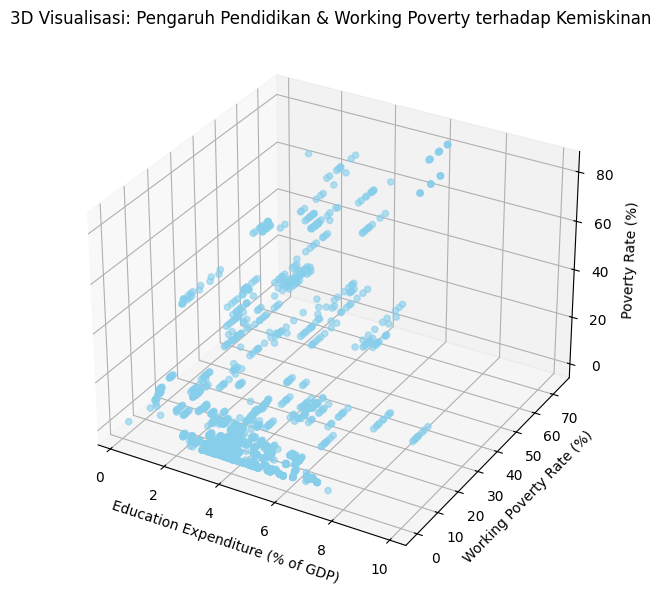

In [44]:
# =======================
# Visualisasi Korelasi 3 Variabel (Opsional 3D)
# =======================
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    merged["Education Expenditure (% of GDP)"],
    merged["Working Poverty Rate"],
    merged["Poverty Rate"],
    c='skyblue', alpha=0.6
)
ax.set_xlabel("Education Expenditure (% of GDP)")
ax.set_ylabel("Working Poverty Rate (%)")
ax.set_zlabel("Poverty Rate (%)")
ax.set_title("3D Visualisasi: Pengaruh Pendidikan & Working Poverty terhadap Kemiskinan")
plt.tight_layout()
plt.show()

In [45]:
# =======================
# Rekomendasi Kebijakan Berdasarkan Model Multivariat
# =======================
print("\n--- Rekomendasi Kebijakan ---")
if r2_m > 0.3:
    print("- Terdapat hubungan signifikan antara pengeluaran pendidikan dan kemiskinan jika digabungkan dengan faktor kemiskinan kerja.")
    if model_multi.coef_[0] < 0:
        print("- Pengeluaran pendidikan yang lebih tinggi berkorelasi negatif terhadap tingkat kemiskinan.")
    if model_multi.coef_[1] > 0:
        print("- Tingginya kemiskinan kerja turut memperburuk kemiskinan umum.")
    print("- Disarankan pemerintah meningkatkan anggaran pendidikan dan mengurangi kemiskinan kerja (dengan pelatihan atau jaminan sosial).")
else:
    print("- Hubungan antar variabel lemah. Evaluasi faktor struktural lain seperti ketimpangan pendapatan dan akses pendidikan diperlukan.")


--- Rekomendasi Kebijakan ---
- Terdapat hubungan signifikan antara pengeluaran pendidikan dan kemiskinan jika digabungkan dengan faktor kemiskinan kerja.
- Pengeluaran pendidikan yang lebih tinggi berkorelasi negatif terhadap tingkat kemiskinan.
- Tingginya kemiskinan kerja turut memperburuk kemiskinan umum.
- Disarankan pemerintah meningkatkan anggaran pendidikan dan mengurangi kemiskinan kerja (dengan pelatihan atau jaminan sosial).
